# Introduction to the problem
<br>
Fundamental analysis using Regression
<br><br>
This module would introduce us to the Regression related inferences to be drawn from the data.
Regression is basically a statistical approach to find the relationship between variables. In machine learning, this is used to
predict the outcome of an event based on the relationship between variables obtained from the data-set. More often than
not, we utilize linear regression to come up with an ideal inference. We'd be using the regression model to solve the
following problems:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #seaborn is more compatible library when we are comparing two data series
import warnings
warnings.filterwarnings('ignore')

<b> Problem Statement 3.1</b><br><br>
Import the file 'gold.csv' (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the
jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the
dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices
with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled. <br><br>
 Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire
column.<br><br>
 Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate.
Mention which column is a linear function and which is polynomial.
(Hint: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)

In [2]:
data=pd.read_csv('data/GOLD.csv')

In [3]:
data.shape


(512, 9)

In [4]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [5]:
data.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [6]:
data_lr=data.dropna()

In [7]:
data_lr.shape


(411, 9)

In [8]:
X=data_lr[['Price', 'Open','High','Low']] #importing dependent and independent variables.
y=data_lr['Pred']

In [9]:
from sklearn.model_selection import train_test_split #sklearn is an important library for ml, the train_test_split the problem
#into two parts training set and test set
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)#here taking 1/3 of the data as test set and 
#random_state is used to randomize the index


In [10]:
X_train.head()

,Price,Open,High,Low
382,31631,31650,31780,31590
181,29761,29876,29884,29705
119,29541,29600,29622,29524
361,30614,30399,30660,30376
209,30306,30518,30597,30270


In [11]:
#Linear regression is a part of Linear model
from sklearn import linear_model


In [12]:
lm=linear_model.LinearRegression()



In [13]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lm.coef_


array([ 2.,  3., -1., -4.])

In [15]:

coeffs= pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeffs


,Coefficient
Price,2.0
Open,3.0
High,-1.0
Low,-4.0


In [16]:
predictions=lm.predict(X_test)

In [17]:
import statsmodels.api as sm
#make regression model (Homework)
model=sm.OLS(y_test,predictions)
#fit model and print results.
results1=model.fit()
print(results1.summary())


                                 OLS Regression Results                                
Dep. Variable:                   Pred   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.493e+29
Date:                Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                        17:24:54   Log-Likelihood:                          3218.2
No. Observations:                 136   AIC:                                     -6434.
Df Residuals:                     135   BIC:                                     -6432.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

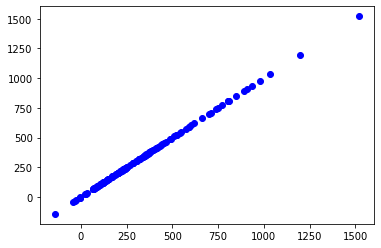

In [18]:

plt.scatter(y_test,predictions, c=['b'])

In [19]:
data['Pred']=lm.predict(data[['Price','Open','High','Low']])

In [20]:
data.shape


(512, 9)

In [21]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Pred        0
new         0
dtype: int64

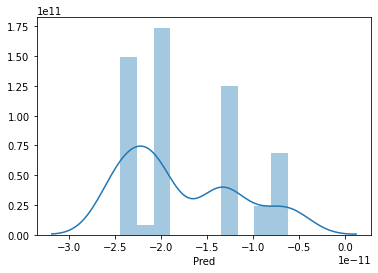

In [22]:
#Residual Histogram tells the frequency of error values
sns.distplot(y_test-predictions,bins=10)

In [23]:
#same thing OLS ORDINARY LEAST SQUARE
import statsmodels.api as sm
X=data_lr[['Price', 'Open','High','Low']] #importing dependent and independent variables.
y1=data_lr['Pred']

#Add a constant to the independent value
X1=sm.add_constant(X)

#make regression model
model=sm.OLS(y1,X1)
#fit model and print results.
results1=model.fit()
print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:                   Pred   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.094e+26
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:25:55   Log-Likelihood:                 8839.4
No. Observations:                 411   AIC:                        -1.767e+04
Df Residuals:                     406   BIC:                        -1.765e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.631e-11   1.65e-10      0.099      0.9

In [24]:
import statsmodels.api as sm
X=data_lr[['Price', 'Open','High','Low']] #importing dependent and independent variables.
y1=data_lr['new']

#Add a constant to the independent value
X1=sm.add_constant(X)

#make regression model
model=sm.OLS(y1,X1)
#fit model and print results.
results1=model.fit()
print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:                    new   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.726e+07
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:25:55   Log-Likelihood:                -287.72
No. Observations:                 411   AIC:                             585.4
Df Residuals:                     406   BIC:                             605.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2162      0.728     -0.297      0.7

<b>Problem Statement</b><br><br>
Import the stock of your choosing AND the Nifty index.
Using linear regression (OLS), calculate -
-> The daily Beta value for the past 3 months. (Daily= Daily returns)\
-> The monthly Beta value. (Monthly= Monthly returns)
Refrain from using the (covariance(x,y)/variance(x)) formula.
Attempt the question using regression.(
Regression Reference (https://financetrain.com/calculating-beta-using-marketmodel-
regression-slope/))
Were the Beta values more or less than 1 ? What if it was negative ?
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values andregression results

In [36]:
import pandas as pd
import statsmodels.api as sm
hdfc=pd.read_csv('data/HDFCBANK.csv')
hdfc=hdfc[hdfc.Series=='EQ']
hdfc.index=hdfc.Date
nifty=pd.read_csv('data/Nifty50.csv')
nifty.index=nifty.Date
#joining the closing prices of the dataset
prices=pd.concat([hdfc['Close Price'],nifty['Close']],axis=1)
prices.columns=['hdfc','nifty']

#checking the head of the dataframe
print(prices.head())

returns=prices.pct_change()
returns=returns.dropna(axis=0) #drop first missing row
returns.head()

                hdfc    nifty
Date                         
15-May-2017  1553.40  9445.40
16-May-2017  1559.65  9512.25
17-May-2017  1557.15  9525.75
18-May-2017  1557.10  9429.45
19-May-2017  1561.25  9427.90


,hdfc,nifty
Date,,
16-May-2017,0.004023,0.007078
17-May-2017,-0.001603,0.001419
18-May-2017,-0.000032,-0.010109
19-May-2017,0.002665,-0.000164
22-May-2017,0.009448,0.001098


In [37]:
#in a single month in financial market the number of days is 20. So in 3 months it is 60
returns=returns.iloc[-60:,:]
returns

,hdfc,nifty
Date,,
11-Feb-2019,0.008009,-0.005007
12-Feb-2019,-0.004650,-0.005271
13-Feb-2019,0.006456,-0.003485
14-Feb-2019,-0.015512,-0.004410
15-Feb-2019,-0.004526,-0.002015
18-Feb-2019,-0.005117,-0.007781
19-Feb-2019,-0.002799,-0.003440
20-Feb-2019,0.011660,0.012363
21-Feb-2019,0.003581,0.005067


In [38]:
X=returns['nifty'] #independent variable
y=returns['hdfc'] #dependent variable 
#adding a constant to independent variable
X1=sm.add_constant(X)

#make regression model
model=sm.OLS(y,X1)

#fit model and print results.
results1=model.fit()
print(results1.summary())

#here in the table the coefficient is low which indicates a good result and has a linear regression
#And the nifty value that is the beta value for hdfc is 0.8716
#so in 3 months if we say that the nifty moved by 100 percent. hdfc will moveby 87 percent

                            OLS Regression Results                            
Dep. Variable:                   hdfc   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     34.93
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           1.91e-07
Time:                        17:27:52   Log-Likelihood:                 207.52
No. Observations:                  60   AIC:                            -411.0
Df Residuals:                      58   BIC:                            -406.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.001      0.3

In [39]:
prices['month']=prices.index.str.slice(3) #slicing the 3 months into 3 parts each indicating one path
prices.month

Date
15-May-2017    May-2017
16-May-2017    May-2017
17-May-2017    May-2017
18-May-2017    May-2017
19-May-2017    May-2017
                 ...   
07-May-2019    May-2019
08-May-2019    May-2019
09-May-2019    May-2019
10-May-2019    May-2019
13-May-2019    May-2019
Name: month, Length: 494, dtype: object

In [40]:
import numpy as np
month=np.zeros((25,2), dtype=float)
for i,j in enumerate(prices.month.unique()):
    temp=prices[prices.month==j] #for each month taking the last value
    month[i]=temp.iloc[-1,0:2]
    
month

array([[ 1636.2 ,  9621.25],
       [ 1652.05,  9520.9 ],
       [ 1784.4 , 10077.1 ],
       [ 1776.45,  9917.9 ],
       [ 1805.7 ,  9788.6 ],
       [ 1808.5 , 10335.3 ],
       [ 1853.7 , 10226.55],
       [ 1872.4 , 10530.7 ],
       [ 2005.7 , 11027.7 ],
       [ 1884.2 , 10492.85],
       [ 1886.1 , 10113.7 ],
       [ 1944.3 , 10739.35],
       [ 2139.45, 10736.15],
       [ 2108.45, 10714.3 ],
       [ 2179.5 , 11356.5 ],
       [ 2061.2 , 11680.5 ],
       [ 2006.05, 10930.45],
       [ 1911.75, 10386.6 ],
       [ 2128.45, 10876.75],
       [ 2121.7 , 10862.55],
       [ 2079.95, 10830.95],
       [ 2077.55, 10792.5 ],
       [ 2318.9 , 11623.9 ],
       [ 2317.45, 11748.15],
       [ 2287.2 , 11148.2 ]])

In [41]:
month=pd.DataFrame(month)

In [42]:
month.columns=['hdfc','nifty']
month.index=prices['month'].unique() #choosing the month as the index
month

,hdfc,nifty
May-2017,1636.20,9621.25
Jun-2017,1652.05,9520.90
Jul-2017,1784.40,10077.10
Aug-2017,1776.45,9917.90
Sep-2017,1805.70,9788.60
Oct-2017,1808.50,10335.30
Nov-2017,1853.70,10226.55
Dec-2017,1872.40,10530.70
Jan-2018,2005.70,11027.70
Feb-2018,1884.20,10492.85


In [43]:
#running the same regression function to calculate the Beta value.

X=returns['nifty'] #independent variable
y=returns['hdfc'] #dependent variable 

#adding a constant to independent variable
X1=sm.add_constant(X)

#make regression model
model=sm.OLS(y,X1)

#fit model and print results.
results1=model.fit()
print(results1.summary())



                            OLS Regression Results                            
Dep. Variable:                   hdfc   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     34.93
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           1.91e-07
Time:                        17:27:55   Log-Likelihood:                 207.52
No. Observations:                  60   AIC:                            -411.0
Df Residuals:                      58   BIC:                            -406.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.001      0.3

In [44]:
#here the coefficient of the constant is 0.0010 which is low that is good thing. As it says a linear regression model
#And the coefficient of the nifty is 0.8716
#So over the past two years the monthly beta value is 0.8716.
#Hence if the nifty moves by 100 percent, hdfc is expected to move by 87 percent in the any direction is the nifty changes 
#that is the beta value
#here the beta value is 0.8716 which is less than 1 that indicates less risks lower returns. If it is more than 1 than 
#the beta has higher risk and higher returns.
#also note that by definition the market beta value is 1.0
#Also a negative beta value indicates that the investment moves in the opposite side of the market.
#That is if the market value rises, investment value falls and vice-versa